# Homegrown vs Foreign
### Are homegrown players generally the best in their respective leagues or are they inferior to the foreign players playing in that league? Are these findings portrayed in the FIFA 18’s ratings. 

In [47]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
%matplotlib inline 

In [2]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

In [3]:
RQ2 = RQ2[['Players','Position','Clubs','league','age','nationality','overall','Continent','Homegrown','Starts/Apps','Subbed Off/Apps','Overall Apps','Average Form','Goals/Apps','Assists/Apps','Clean Sheets/Apps']]

In [4]:
RQ2.head(5)

,Players,Position,Clubs,league,age,nationality,overall,Continent,Homegrown,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Lionel Messi,Forward,BARC,Spanish Primera Division,30.0,Argentina,93.0,South America,False,0.934524,0.059524,168.0,8.255952,1.065476,0.386905,0.0
2,Cristiano Ronaldo,Forward,MADR,Spanish Primera Division,32.0,Portugal,94.0,Europe,False,0.975610,0.109756,164.0,7.926829,1.054878,0.317073,0.0
3,Zlatan Ibrahimovic,Forward,PSG,English Premier League,35.0,Sweden,88.0,Europe,False,0.959016,0.114754,122.0,7.286885,0.926230,0.311475,0.0
4,Luis Suarez,Forward,BARC,Spanish Primera Division,30.0,Uruguay,92.0,South America,False,0.959596,0.202020,99.0,7.252525,0.848485,0.424242,0.0
5,Denis Bouanga,Midfielder,LORI,French Ligue 2,22.0,Gabon,71.0,Africa,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.0


### Part 1: Who Preforms Better vs Who Is Better Rated 

In [5]:
best_preforming = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_preforming = best_preforming.groupby(['nationality']).mean()[['Average Form']].sort_values('Average Form', ascending=False)
best_preforming

,Average Form
nationality,
France,2.211816
Germany,2.115644
Spain,2.066008
England,2.036970
Italy,1.994722


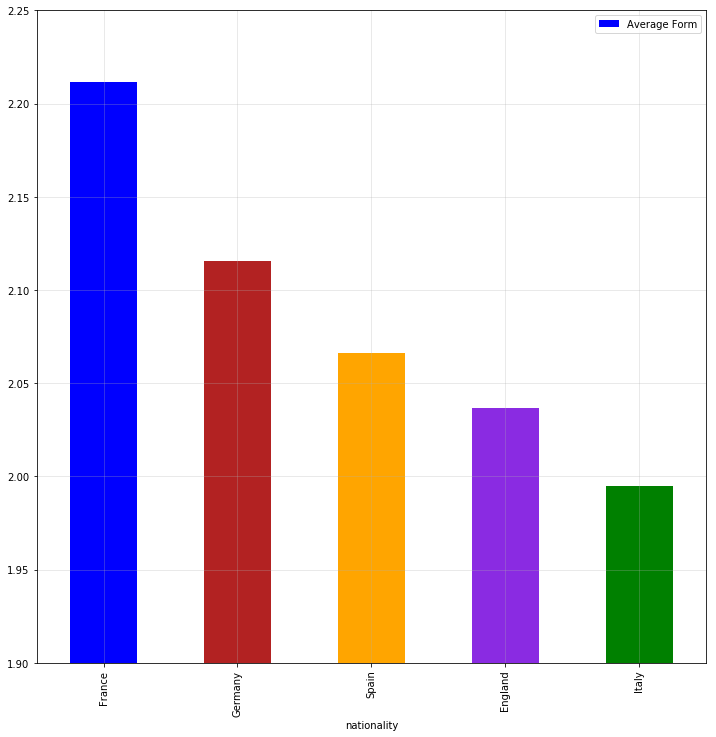

In [6]:
best_preforming.plot(figsize=(12,12),kind='bar',color=[['blue','firebrick','orange','blueviolet','green']])
axes = plt.gca()
axes.set_ylim([1.9,2.25])
axes.grid(True,alpha=0.35)

In [7]:
best_rated = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_rated = best_rated.groupby(['nationality']).mean()[['overall']].sort_values('overall', ascending=False)
best_rated

,overall
nationality,
Spain,74.668845
Germany,73.321962
France,73.003058
Italy,72.768519
England,72.111979


Text(0.5,0,'Nationality')

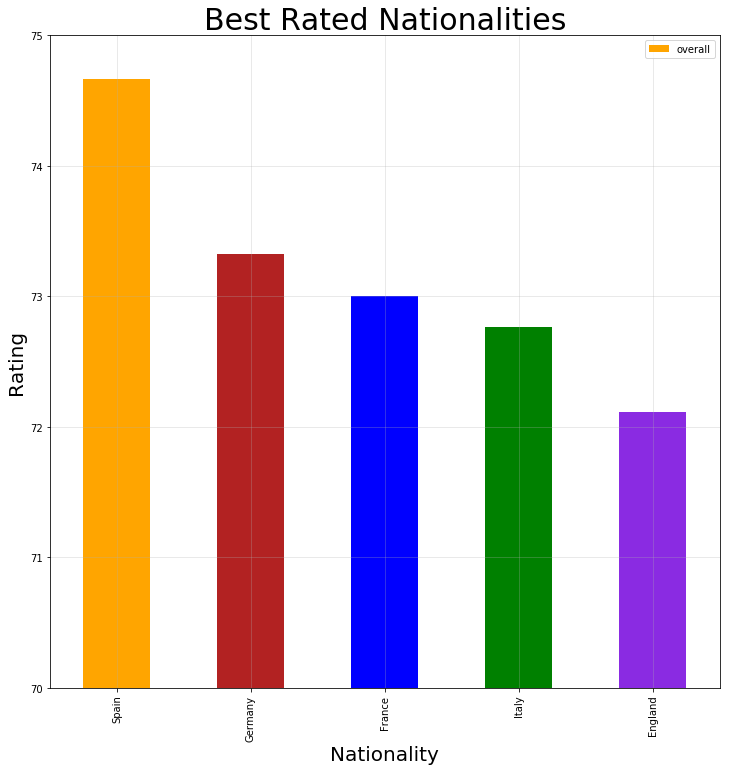

In [8]:
best_rated.plot(figsize=(12,12),kind='bar',color=[['orange','firebrick','blue','green','blueviolet']])
axes = plt.gca()
axes.set_ylim([70,75])
axes.grid(True,alpha=0.35)
axes.set_title('Best Rated Nationalities',size=30)
axes.set_ylabel('Rating',size=20)
axes.set_xlabel('Nationality',size=20)

### Lets look at the Domestic Leagues

In [9]:
EPL = RQ2.loc[RQ2.league=='English Premier League']
BUN = RQ2.loc[RQ2.league=='German Bundesliga']
LAL = RQ2.loc[RQ2.league=='Spanish Primera Division']
L1 = RQ2.loc[RQ2.league=='French Ligue 1']
SEI = RQ2.loc[RQ2.league=='Italian Serie A']

In [10]:
Homegrown_EPL = EPL.loc[EPL.Homegrown==True]
Foreign_EPL = EPL.loc[EPL.Homegrown==False]

Homegrown_BUN = BUN.loc[BUN.Homegrown==True]
Foreign_BUN = BUN.loc[BUN.Homegrown==False]

Homegrown_LAL = LAL.loc[LAL.Homegrown==True]
Foreign_LAL = LAL.loc[LAL.Homegrown==False]

Homegrown_L1 = L1.loc[L1.Homegrown==True]
Foreign_L1 = L1.loc[L1.Homegrown==False]

Homegrown_SEI = SEI.loc[SEI.Homegrown==True]
Foreign_SEI = SEI.loc[SEI.Homegrown==False]

### Player Count (What proportion of players are homegrown in each league)

In [11]:
HEPL = len(Homegrown_EPL)
HBUN = len(Homegrown_BUN)
HLAL = len(Homegrown_LAL)
FEPL = len(Foreign_EPL)
FBUN = len(Foreign_BUN)
FLAL = len(Foreign_LAL)
HL1 = len(Homegrown_L1)
HSEI = len(Homegrown_SEI)
FL1 = len(Foreign_L1)
FSEI = len(Foreign_SEI)


columns = ['Homegrown','Foreign']
count = pd.DataFrame(columns=columns)
count = count.fillna(0) # with 0s rather than NaNs
count['Homegrown']=HEPL,HBUN,HLAL,HL1,HSEI
count['Foreign']=FEPL,FBUN,FLAL,FL1,FSEI
count = count.transpose()
count.columns = ['EPL', 'BUN','LAL','L1','SEI']
count['Total'] = count.sum(axis=1)

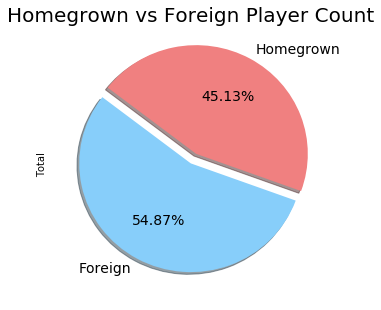

In [12]:
explode = (0.1, 0)
labels = ["Homegrown","Foreign"]
count.plot(subplots=True,kind='pie',y='Total',figsize=(5,5),fontsize=14,explode=explode,autopct='%1.2f%%',shadow=True,labels=labels,labeldistance=1.1,startangle=340,colors=['lightcoral','lightskyblue'])
plt.title('Homegrown vs Foreign Player Count',loc='center',size=20)
plt.legend().set_visible(False)

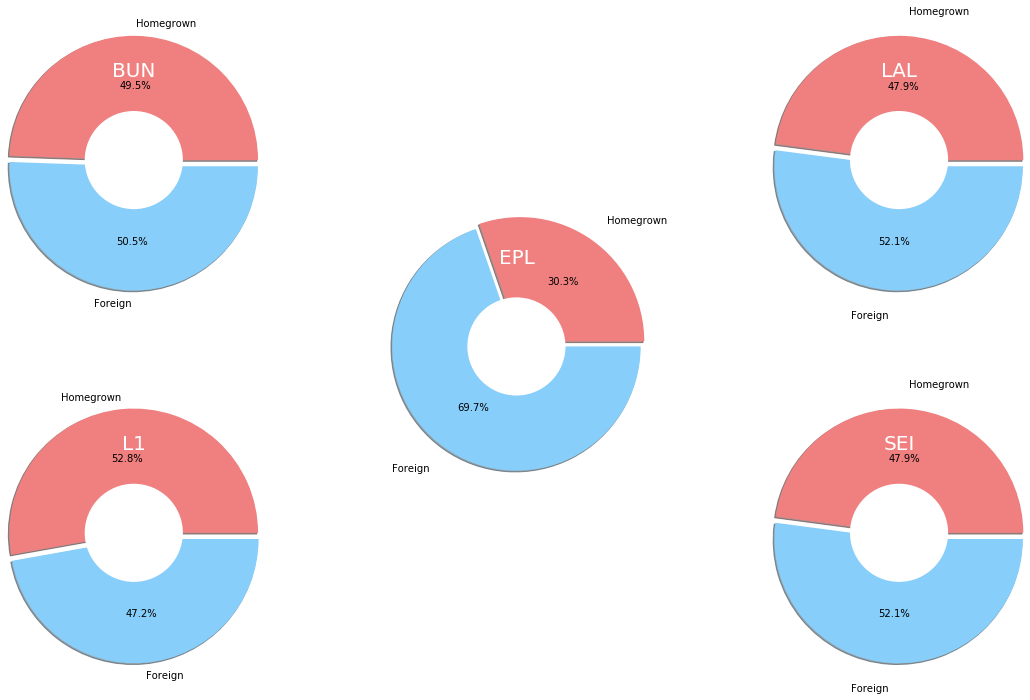

In [57]:
the_grid = GridSpec(6,6)

count.plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(count['EPL'],labels=['Homegrown','Foreign'],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['lightcoral','lightskyblue'],explode=explode2)
plt.gca().set_title('EPL',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[3, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['BUN'],labels=['Homegrown','Foreign'],labeldistance=1.1,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['lightcoral','lightskyblue'],explode=explode3)
plt.gca().set_title('BUN',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['LAL'],labels=['Homegrown','Foreign'],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['lightcoral','lightskyblue'])
plt.gca().set_title('LAL',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['L1'],labels=['Homegrown','Foreign'],labeldistance=1.1,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['lightcoral','lightskyblue'],explode=explode3)
plt.gca().set_title('L1',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['SEI'],labels=['Homegrown','Foreign'],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['lightcoral','lightskyblue'])
plt.gca().set_title('SEI',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### % of Homegrown Players Playing Abroad

In [ ]:
ENG_league

In [14]:
ENG_abroad = RQ2.loc[(RQ2.nationality=='England') & (RQ2.league!='English Premier League')]
GER_abroad = RQ2.loc[(RQ2.nationality=='Germany') & (RQ2.league!='German Bundesliga')]
SPA_abroad = RQ2.loc[(RQ2.nationality=='Spain') & (RQ2.league!='Spanish Primera Division')]
FR_abroad = RQ2.loc[(RQ2.nationality=='France') & (RQ2.league!='French Ligue 1')]
ITA_abroad = RQ2.loc[(RQ2.nationality=='Italy') & (RQ2.league!='Italian Serie A')]

In [54]:
ENG_abroad['league'].unique()

array(['English Championship', 'USA Major League Soccer',
       'English League Two', 'English League One', 'Mexican Liga MX',
       'Japanese J1 League', 'Scottish Premiership',
       'Spanish Segunda Division', 'German Bundesliga'], dtype=object)

### Breakdown of Positions

In [41]:
EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Average Form'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Average Form'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','Average Form'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','Average Form'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','Average Form'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','Average Form'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Average Form'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Average Form'].mean()

EPL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_positions.set_value(0,'Position',"Goalkeeper")
EPL_positions.set_value(0,'Homegrown',EPL_H_GK)
EPL_positions.set_value(0,'Foreign',EPL_F_GK)
EPL_positions.set_value(1,'Position',"Defender")
EPL_positions.set_value(1,'Homegrown',EPL_H_DEF)
EPL_positions.set_value(1,'Foreign',EPL_F_DEF)
EPL_positions.set_value(2,'Position',"Midfielder")
EPL_positions.set_value(2,'Homegrown',EPL_H_MID)
EPL_positions.set_value(2,'Foreign',EPL_F_MID)
EPL_positions.set_value(3,'Position',"Forward")
EPL_positions.set_value(3,'Homegrown',EPL_H_FWD)
EPL_positions.set_value(3,'Foreign',EPL_F_FWD)

EPL_positions =EPL_positions.transpose()
EPL_positions.columns =EPL_positions.iloc[0]
EPL_positions =EPL_positions.drop(EPL_positions.index[0])
EPL_positions =EPL_positions.transpose()



EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','overall'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','overall'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','overall'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','overall'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','overall'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','overall'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','overall'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','overall'].mean()

EPL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_overall.set_value(0,'Position',"Goalkeeper")
EPL_overall.set_value(0,'Homegrown',EPL_H_GK)
EPL_overall.set_value(0,'Foreign',EPL_F_GK)
EPL_overall.set_value(1,'Position',"Defender")
EPL_overall.set_value(1,'Homegrown',EPL_H_DEF)
EPL_overall.set_value(1,'Foreign',EPL_F_DEF)
EPL_overall.set_value(2,'Position',"Midfielder")
EPL_overall.set_value(2,'Homegrown',EPL_H_MID)
EPL_overall.set_value(2,'Foreign',EPL_F_MID)
EPL_overall.set_value(3,'Position',"Forward")
EPL_overall.set_value(3,'Homegrown',EPL_H_FWD)
EPL_overall.set_value(3,'Foreign',EPL_F_FWD)

EPL_overall =EPL_overall.transpose()
EPL_overall.columns =EPL_overall.iloc[0]
EPL_overall =EPL_overall.drop(EPL_overall.index[0])
EPL_overall =EPL_overall.transpose()

In [42]:
LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Average Form'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Average Form'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','Average Form'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','Average Form'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','Average Form'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','Average Form'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Average Form'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Average Form'].mean()

LAL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_positions.set_value(0,'Position',"Goalkeeper")
LAL_positions.set_value(0,'Homegrown',LAL_H_GK)
LAL_positions.set_value(0,'Foreign',LAL_F_GK)
LAL_positions.set_value(1,'Position',"Defender")
LAL_positions.set_value(1,'Homegrown',LAL_H_DEF)
LAL_positions.set_value(1,'Foreign',LAL_F_DEF)
LAL_positions.set_value(2,'Position',"Midfielder")
LAL_positions.set_value(2,'Homegrown',LAL_H_MID)
LAL_positions.set_value(2,'Foreign',LAL_F_MID)
LAL_positions.set_value(3,'Position',"Forward")
LAL_positions.set_value(3,'Homegrown',LAL_H_FWD)
LAL_positions.set_value(3,'Foreign',LAL_F_FWD)

LAL_positions =LAL_positions.transpose()
LAL_positions.columns =LAL_positions.iloc[0]
LAL_positions =LAL_positions.drop(LAL_positions.index[0])
LAL_positions =LAL_positions.transpose()
LAL_positions



LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','overall'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','overall'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','overall'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','overall'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','overall'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','overall'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','overall'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','overall'].mean()

LAL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_overall.set_value(0,'Position',"Goalkeeper")
LAL_overall.set_value(0,'Homegrown',LAL_H_GK)
LAL_overall.set_value(0,'Foreign',LAL_F_GK)
LAL_overall.set_value(1,'Position',"Defender")
LAL_overall.set_value(1,'Homegrown',LAL_H_DEF)
LAL_overall.set_value(1,'Foreign',LAL_F_DEF)
LAL_overall.set_value(2,'Position',"Midfielder")
LAL_overall.set_value(2,'Homegrown',LAL_H_MID)
LAL_overall.set_value(2,'Foreign',LAL_F_MID)
LAL_overall.set_value(3,'Position',"Forward")
LAL_overall.set_value(3,'Homegrown',LAL_H_FWD)
LAL_overall.set_value(3,'Foreign',LAL_F_FWD)

LAL_overall =LAL_overall.transpose()
LAL_overall.columns =LAL_overall.iloc[0]
LAL_overall =LAL_overall.drop(LAL_overall.index[0])
LAL_overall =LAL_overall.transpose()

In [43]:
BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Average Form'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Average Form'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','Average Form'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','Average Form'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','Average Form'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','Average Form'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Average Form'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Average Form'].mean()

BUN_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_positions.set_value(0,'Position',"Goalkeeper")
BUN_positions.set_value(0,'Homegrown',BUN_H_GK)
BUN_positions.set_value(0,'Foreign',BUN_F_GK)
BUN_positions.set_value(1,'Position',"Defender")
BUN_positions.set_value(1,'Homegrown',BUN_H_DEF)
BUN_positions.set_value(1,'Foreign',BUN_F_DEF)
BUN_positions.set_value(2,'Position',"Midfielder")
BUN_positions.set_value(2,'Homegrown',BUN_H_MID)
BUN_positions.set_value(2,'Foreign',BUN_F_MID)
BUN_positions.set_value(3,'Position',"Forward")
BUN_positions.set_value(3,'Homegrown',BUN_H_FWD)
BUN_positions.set_value(3,'Foreign',BUN_F_FWD)


BUN_positions =BUN_positions.transpose()
BUN_positions.columns =BUN_positions.iloc[0]
BUN_positions =BUN_positions.drop(BUN_positions.index[0])
BUN_positions =BUN_positions.transpose()
BUN_positions = BUN_positions.reset_index()
BUN_positions


BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','overall'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','overall'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','overall'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','overall'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','overall'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','overall'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','overall'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','overall'].mean()

BUN_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_overall.set_value(0,'Position',"Goalkeeper")
BUN_overall.set_value(0,'Homegrown',BUN_H_GK)
BUN_overall.set_value(0,'Foreign',BUN_F_GK)
BUN_overall.set_value(1,'Position',"Defender")
BUN_overall.set_value(1,'Homegrown',BUN_H_DEF)
BUN_overall.set_value(1,'Foreign',BUN_F_DEF)
BUN_overall.set_value(2,'Position',"Midfielder")
BUN_overall.set_value(2,'Homegrown',BUN_H_MID)
BUN_overall.set_value(2,'Foreign',BUN_F_MID)
BUN_overall.set_value(3,'Position',"Forward")
BUN_overall.set_value(3,'Homegrown',BUN_H_FWD)
BUN_overall.set_value(3,'Foreign',BUN_F_FWD)

BUN_overall =BUN_overall.transpose()
BUN_overall.columns =BUN_overall.iloc[0]
BUN_overall =BUN_overall.drop(BUN_overall.index[0])
BUN_overall =BUN_overall.transpose()

In [44]:
L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Average Form'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Average Form'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','Average Form'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','Average Form'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','Average Form'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','Average Form'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Average Form'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Average Form'].mean()

L1_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_positions.set_value(0,'Position',"Goalkeeper")
L1_positions.set_value(0,'Homegrown',L1_H_GK)
L1_positions.set_value(0,'Foreign',L1_F_GK)
L1_positions.set_value(1,'Position',"Defender")
L1_positions.set_value(1,'Homegrown',L1_H_DEF)
L1_positions.set_value(1,'Foreign',L1_F_DEF)
L1_positions.set_value(2,'Position',"Midfielder")
L1_positions.set_value(2,'Homegrown',L1_H_MID)
L1_positions.set_value(2,'Foreign',L1_F_MID)
L1_positions.set_value(3,'Position',"Forward")
L1_positions.set_value(3,'Homegrown',L1_H_FWD)
L1_positions.set_value(3,'Foreign',L1_F_FWD)

L1_positions =L1_positions.transpose()
L1_positions.columns =L1_positions.iloc[0]
L1_positions =L1_positions.drop(L1_positions.index[0])
L1_positions =L1_positions.transpose()
L1_positions = L1_positions.reset_index()
L1_positions


L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','overall'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','overall'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','overall'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','overall'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','overall'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','overall'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','overall'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','overall'].mean()

L1_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_overall.set_value(0,'Position',"Goalkeeper")
L1_overall.set_value(0,'Homegrown',L1_H_GK)
L1_overall.set_value(0,'Foreign',L1_F_GK)
L1_overall.set_value(1,'Position',"Defender")
L1_overall.set_value(1,'Homegrown',L1_H_DEF)
L1_overall.set_value(1,'Foreign',L1_F_DEF)
L1_overall.set_value(2,'Position',"Midfielder")
L1_overall.set_value(2,'Homegrown',L1_H_MID)
L1_overall.set_value(2,'Foreign',L1_F_MID)
L1_overall.set_value(3,'Position',"Forward")
L1_overall.set_value(3,'Homegrown',L1_H_FWD)
L1_overall.set_value(3,'Foreign',L1_F_FWD)

L1_overall =L1_overall.transpose()
L1_overall.columns =L1_overall.iloc[0]
L1_overall =L1_overall.drop(L1_overall.index[0])
L1_overall =L1_overall.transpose()

In [45]:
SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Average Form'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Average Form'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','Average Form'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','Average Form'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','Average Form'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','Average Form'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Average Form'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Average Form'].mean()

SEI_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_positions.set_value(0,'Position',"Goalkeeper")
SEI_positions.set_value(0,'Homegrown',SEI_H_GK)
SEI_positions.set_value(0,'Foreign',SEI_F_GK)
SEI_positions.set_value(1,'Position',"Defender")
SEI_positions.set_value(1,'Homegrown',SEI_H_DEF)
SEI_positions.set_value(1,'Foreign',SEI_F_DEF)
SEI_positions.set_value(2,'Position',"Midfielder")
SEI_positions.set_value(2,'Homegrown',SEI_H_MID)
SEI_positions.set_value(2,'Foreign',SEI_F_MID)
SEI_positions.set_value(3,'Position',"Forward")
SEI_positions.set_value(3,'Homegrown',SEI_H_FWD)
SEI_positions.set_value(3,'Foreign',SEI_F_FWD)

SEI_positions =SEI_positions.transpose()
SEI_positions.columns =SEI_positions.iloc[0]
SEI_positions =SEI_positions.drop(SEI_positions.index[0])
SEI_positions =SEI_positions.transpose()



SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','overall'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','overall'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','overall'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','overall'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','overall'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','overall'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','overall'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','overall'].mean()

SEI_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_overall.set_value(0,'Position',"Goalkeeper")
SEI_overall.set_value(0,'Homegrown',SEI_H_GK)
SEI_overall.set_value(0,'Foreign',SEI_F_GK)
SEI_overall.set_value(1,'Position',"Defender")
SEI_overall.set_value(1,'Homegrown',SEI_H_DEF)
SEI_overall.set_value(1,'Foreign',SEI_F_DEF)
SEI_overall.set_value(2,'Position',"Midfielder")
SEI_overall.set_value(2,'Homegrown',SEI_H_MID)
SEI_overall.set_value(2,'Foreign',SEI_F_MID)
SEI_overall.set_value(3,'Position',"Forward")
SEI_overall.set_value(3,'Homegrown',SEI_H_FWD)
SEI_overall.set_value(3,'Foreign',SEI_F_FWD)

SEI_overall =SEI_overall.transpose()
SEI_overall.columns =SEI_overall.iloc[0]
SEI_overall =SEI_overall.drop(SEI_overall.index[0])
SEI_overall =SEI_overall.transpose()

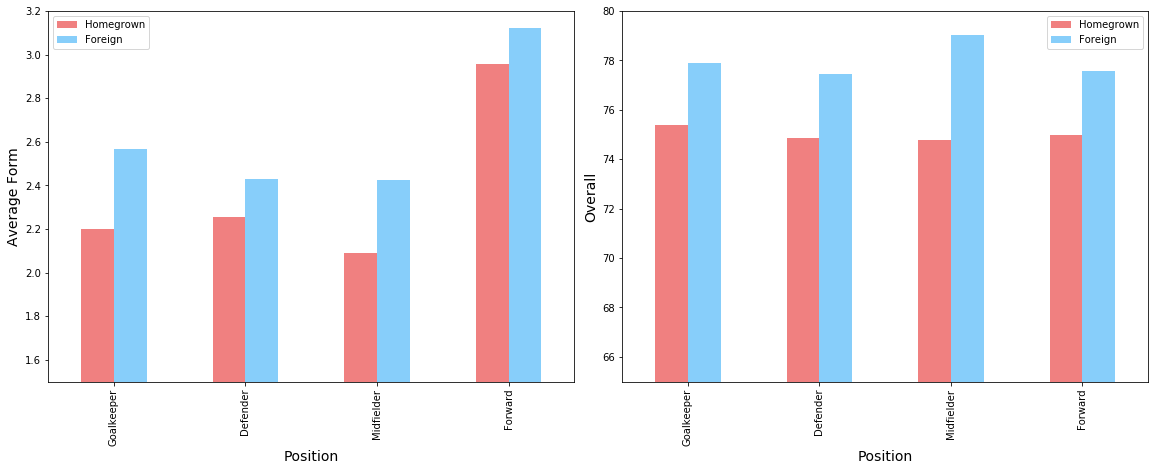

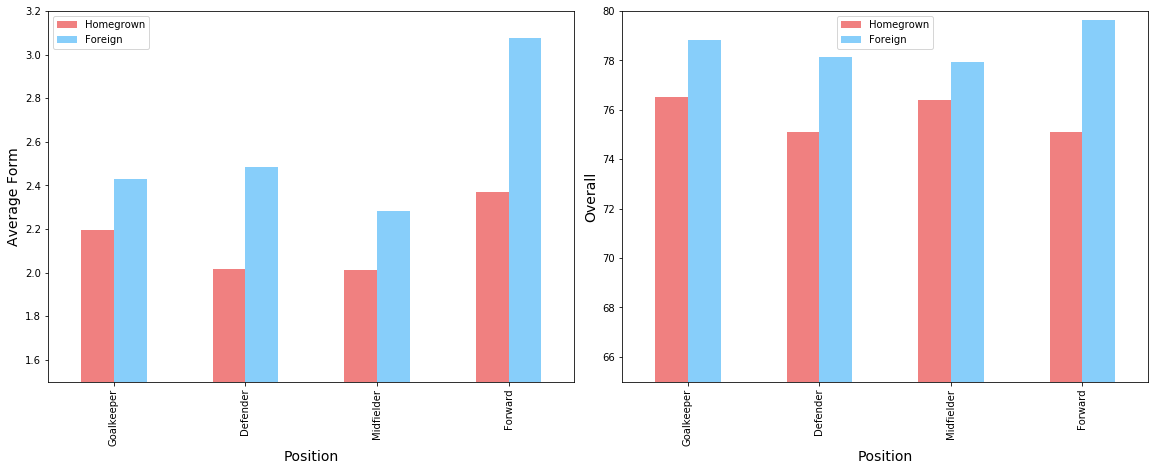

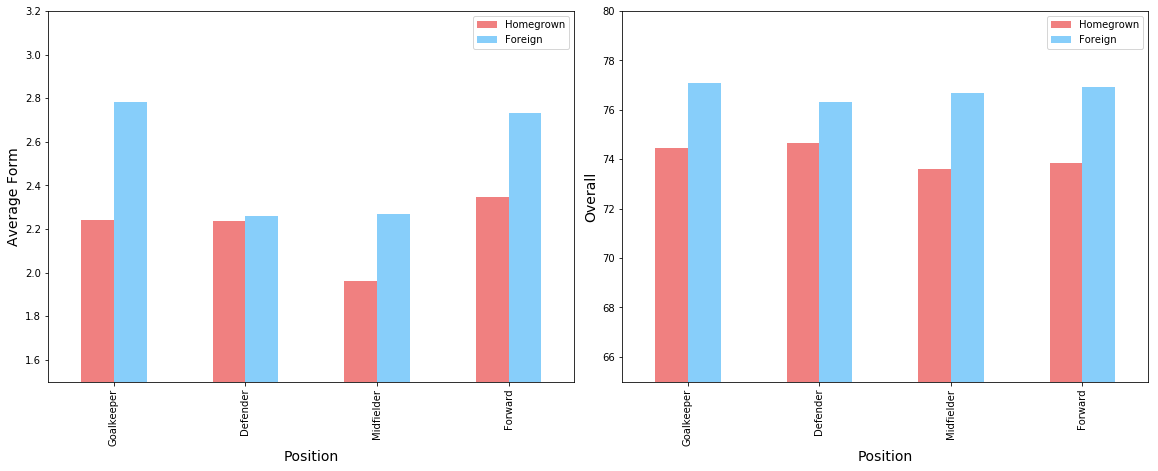

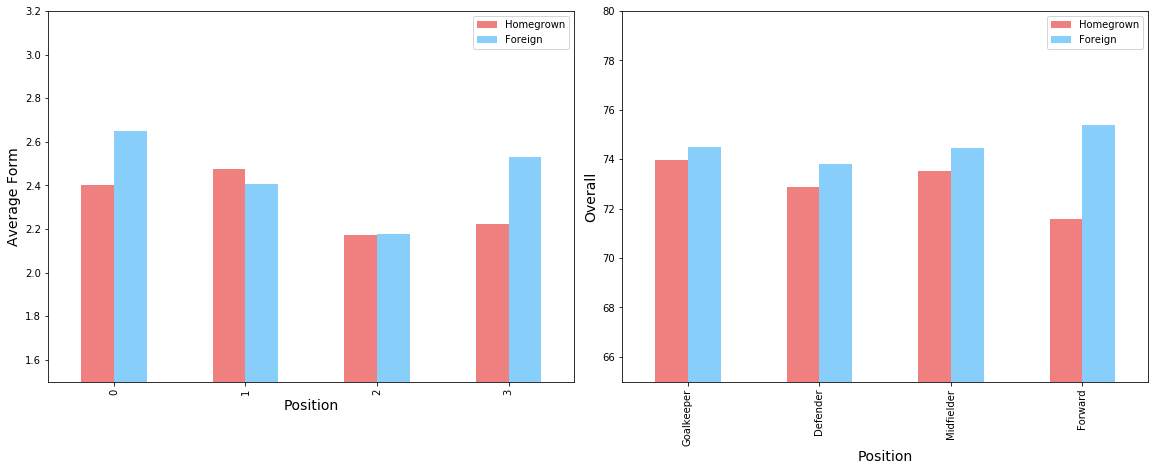

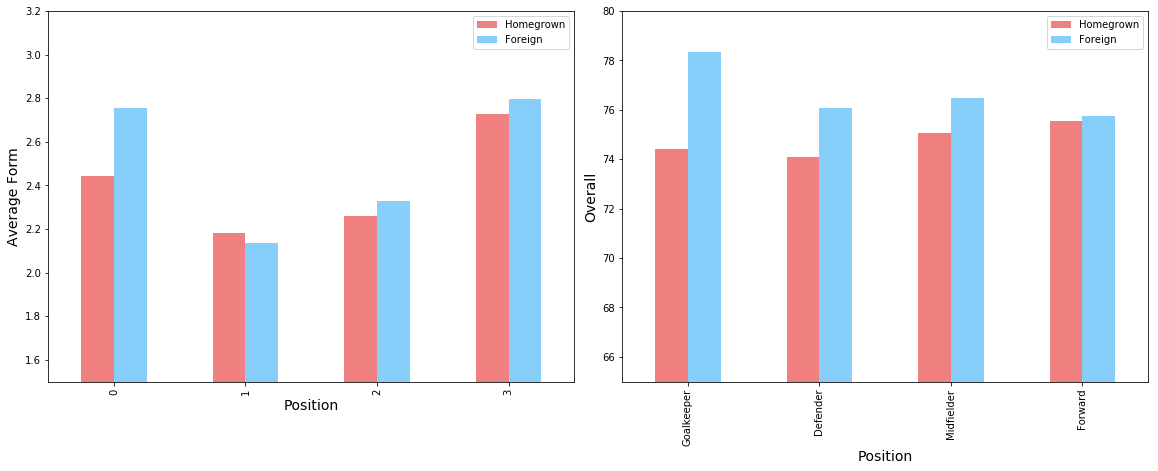

In [50]:
axis_size=14
color = ['lightcoral','lightskyblue']

fig = plt.figure(figsize=(30,15))

gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)

EPL_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([65,80])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
EPL_overall.plot(ax=ax1,kind='bar',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)

LAL_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([65,80])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
LAL_overall.plot(ax=ax1,kind='bar',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)

SEI_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
ax1.set_ylim([65,80])
SEI_overall.plot(ax=ax1,kind='bar',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)

L1_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([65,80])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
L1_overall.plot(ax=ax1,kind='bar',color=color)

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)

BUN_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([65,80])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
BUN_overall.plot(ax=ax1,kind='bar',color=color)

plt.show()

### Whos more likely to Start

In [66]:
EPLH_starts = Homegrown_EPL['Starts/Apps'].mean()
EPLF_starts = Foreign_EPL['Starts/Apps'].mean()

LALH_starts = Homegrown_LAL['Starts/Apps'].mean()
LALF_starts = Foreign_LAL['Starts/Apps'].mean()

BUNH_starts = Homegrown_BUN['Starts/Apps'].mean()
BUNF_starts = Foreign_BUN['Starts/Apps'].mean()

L1H_starts = Homegrown_L1['Starts/Apps'].mean()
L1F_starts = Foreign_L1['Starts/Apps'].mean()

SEIH_starts = Homegrown_SEI['Starts/Apps'].mean()
SEIF_starts = Foreign_SEI['Starts/Apps'].mean()

starts = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
starts.set_value(0,'League',"EPL")
starts.set_value(0,'Homegrown',EPLH_starts)
starts.set_value(0,'Foreign',EPLF_starts)
starts.set_value(1,'League',"LAL")
starts.set_value(1,'Homegrown',LALH_starts )
starts.set_value(1,'Foreign',LALF_starts)
starts.set_value(2,'League',"BUN")
starts.set_value(2,'Homegrown',BUNH_starts)
starts.set_value(2,'Foreign',BUNF_starts)
starts.set_value(3,'League',"L1")
starts.set_value(3,'Homegrown',L1H_starts)
starts.set_value(3,'Foreign',L1F_starts)
starts.set_value(4,'League',"SEI")
starts.set_value(4,'Homegrown',SEIH_starts)
starts.set_value(4,'Foreign',SEIF_starts)
starts

,League,Homegrown,Foreign
0,EPL,0.708178,0.791586
1,LAL,0.713727,0.752787
2,BUN,0.71112,0.729268
3,L1,0.707049,0.717593
4,SEI,0.69758,0.736732


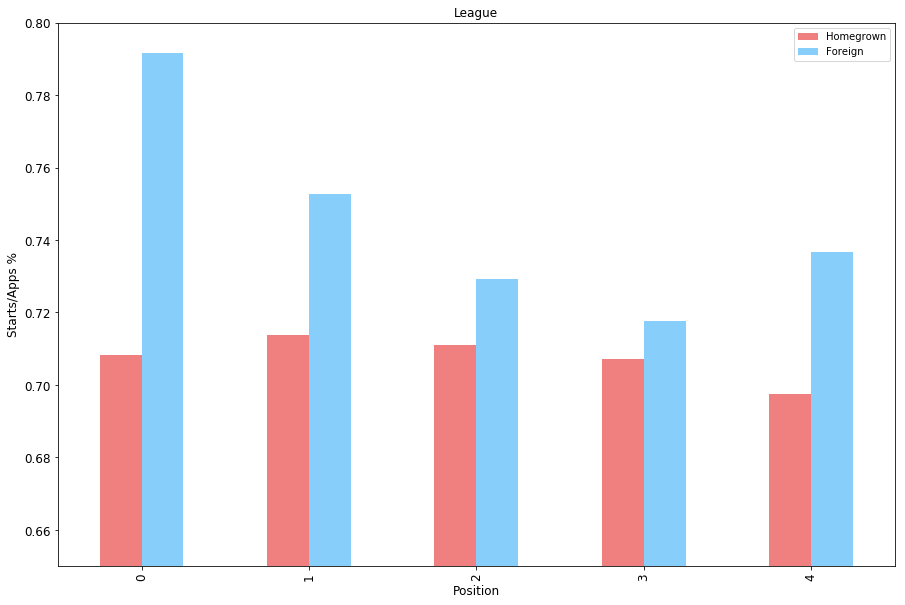

In [92]:
ax = starts[['Homegrown','Foreign']].plot(kind='bar', title ="League", figsize=(15, 10), color= ['lightcoral','lightskyblue'],legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Starts/Apps %", fontsize=12)
ax.set_ylim(0.65,0.8)
plt.show()

### Who's More Likely to be Subbed off 

In [28]:
EPLH_subbed = Homegrown_EPL['Subbed Off/Apps'].mean()
EPLF_subbed = Foreign_EPL['Subbed Off/Apps'].mean()
EPL_subbed = pd.DataFrame([EPLH_subbed,EPLF_subbed])

LALH_subbed = Homegrown_LAL['Subbed Off/Apps'].mean()
LALF_subbed = Foreign_LAL['Subbed Off/Apps'].mean()
LAL_subbed = pd.DataFrame([LALH_subbed,LALF_subbed])

BUNH_subbed = Homegrown_BUN['Subbed Off/Apps'].mean()
BUNF_subbed = Foreign_BUN['Subbed Off/Apps'].mean()
BUN_subbed = pd.DataFrame([BUNH_subbed,BUNF_subbed])

L1H_subbed = Homegrown_L1['Subbed Off/Apps'].mean()
L1F_subbed = Foreign_L1['Subbed Off/Apps'].mean()
L1_subbed = pd.DataFrame([L1H_subbed,L1F_subbed])

SEIH_subbed = Homegrown_SEI['Subbed Off/Apps'].mean()
SEIF_subbed = Foreign_SEI['Subbed Off/Apps'].mean()
SEI_subbed = pd.DataFrame([SEIH_subbed,SEIF_subbed])

subbed = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
subbed.set_value(0,'League',"EPL")
subbed.set_value(0,'Homegrown',EPLH_subbed)
subbed.set_value(0,'Foreign',EPLF_subbed)
subbed.set_value(1,'League',"LAL")
subbed.set_value(1,'Homegrown',LALH_subbed )
subbed.set_value(1,'Foreign',LALF_subbed)
subbed.set_value(2,'League',"BUN")
subbed.set_value(2,'Homegrown',BUNH_subbed)
subbed.set_value(2,'Foreign',BUNF_subbed)
subbed.set_value(3,'League',"L1")
subbed.set_value(3,'Homegrown',L1H_subbed)
subbed.set_value(3,'Foreign',L1F_subbed)
subbed.set_value(4,'League',"SEI")
subbed.set_value(4,'Homegrown',SEIH_subbed)
subbed.set_value(4,'Foreign',SEIF_subbed)

,League,Homegrown,Foreign
0,EPL,0.178559,0.191746
1,LAL,0.191075,0.234759
2,BUN,0.196471,0.213514
3,L1,0.21232,0.182977
4,SEI,0.171712,0.221224


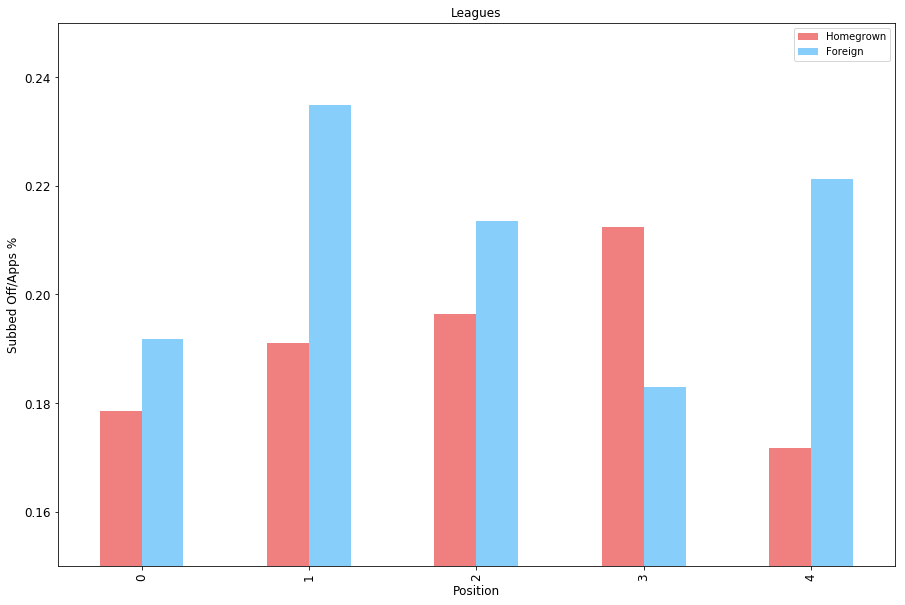

In [91]:
ax = subbed[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True,color= ['lightcoral','lightskyblue'], fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Subbed Off/Apps %", fontsize=12)
ax.set_ylim(0.15,0.25)
plt.show()

### Whos more likely to score all of the goals?

In [30]:
EPLH_goals = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Goals/Apps'].mean()
EPLF_goals = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Goals/Apps'].mean()

BUNH_goals = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Goals/Apps'].mean()
BUNF_goals = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Goals/Apps'].mean()

LALH_goals = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Goals/Apps'].mean()
LALF_goals = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Goals/Apps'].mean()

L1H_goals = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Goals/Apps'].mean()
L1F_goals = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Goals/Apps'].mean()

SEIH_goals = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Goals/Apps'].mean()
SEIF_goals = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Goals/Apps'].mean()

goals = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
goals.set_value(0,'League',"EPL")
goals.set_value(0,'Homegrown',EPLH_goals)
goals.set_value(0,'Foreign',EPLF_goals)
goals.set_value(1,'League',"LAL")
goals.set_value(1,'Homegrown',LALH_goals )
goals.set_value(1,'Foreign',LALF_goals)
goals.set_value(2,'League',"BUN")
goals.set_value(2,'Homegrown',BUNH_goals)
goals.set_value(2,'Foreign',BUNF_goals)
goals.set_value(3,'League',"L1")
goals.set_value(3,'Homegrown',L1H_goals)
goals.set_value(3,'Foreign',L1F_goals)
goals.set_value(4,'League',"SEI")
goals.set_value(4,'Homegrown',SEIH_goals)
goals.set_value(4,'Foreign',SEIF_goals)

,League,Homegrown,Foreign
0,EPL,0.24973,0.26587
1,LAL,0.14989,0.253184
2,BUN,0.194698,0.21531
3,L1,0.125292,0.188185
4,SEI,0.164683,0.207685


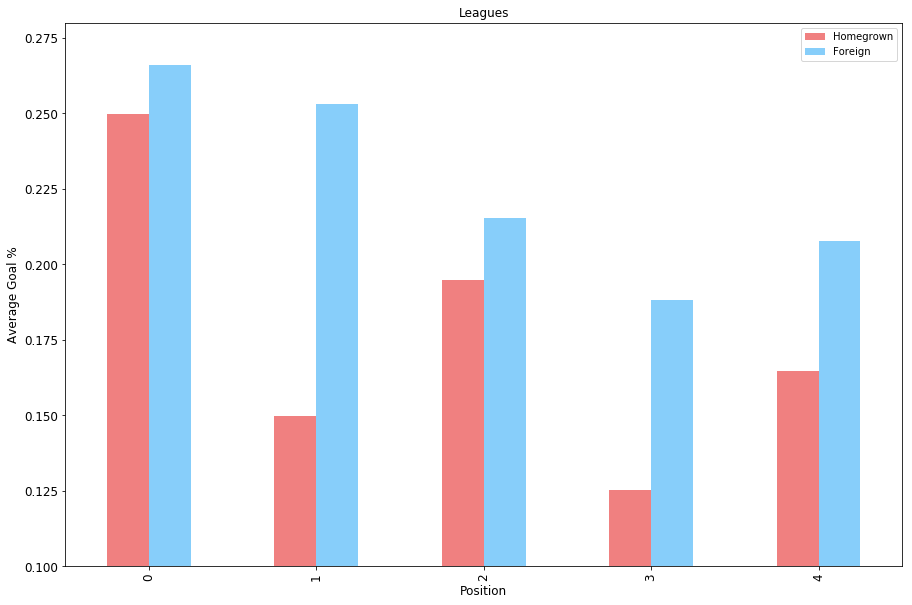

In [90]:
ax = goals[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), color= ['lightcoral','lightskyblue'],legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Goal %", fontsize=12)
ax.set_ylim(0.1,0.28)
plt.show()

### Whos more likely to assist all of the goals?

In [32]:
EPLH_assists = Homegrown_EPL['Assists/Apps'].mean()
EPLF_assists = Foreign_EPL['Assists/Apps'].mean()
EPL_assists = pd.DataFrame([EPLH_assists,EPLF_assists])

LALH_assists = Homegrown_LAL['Assists/Apps'].mean()
LALF_assists = Foreign_LAL['Assists/Apps'].mean()
LAL_assists = pd.DataFrame([LALH_assists,LALF_assists])

BUNH_assists = Homegrown_BUN['Assists/Apps'].mean()
BUNF_assists = Foreign_BUN['Assists/Apps'].mean()
BUN_assists = pd.DataFrame([BUNH_assists,BUNF_assists])

L1H_assists = Homegrown_L1['Assists/Apps'].mean()
L1F_assists = Foreign_L1['Assists/Apps'].mean()
L1_assists = pd.DataFrame([L1H_assists,L1F_assists])

SEIH_assists = Homegrown_SEI['Assists/Apps'].mean()
SEIF_assists = Foreign_SEI['Assists/Apps'].mean()
SEI_assists = pd.DataFrame([SEIH_assists,SEIF_assists])

assists = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
assists.set_value(0,'League',"EPL")
assists.set_value(0,'Homegrown',EPLH_assists)
assists.set_value(0,'Foreign',EPLF_assists)
assists.set_value(1,'League',"LAL")
assists.set_value(1,'Homegrown',LALH_assists )
assists.set_value(1,'Foreign',LALF_assists)
assists.set_value(2,'League',"BUN")
assists.set_value(2,'Homegrown',BUNH_assists)
assists.set_value(2,'Foreign',BUNF_assists)
assists.set_value(3,'League',"L1")
assists.set_value(3,'Homegrown',L1H_assists)
assists.set_value(3,'Foreign',L1F_assists)
assists.set_value(4,'League',"SEI")
assists.set_value(4,'Homegrown',SEIH_assists)
assists.set_value(4,'Foreign',SEIF_assists)

,League,Homegrown,Foreign
0,EPL,0.0574672,0.0658452
1,LAL,0.0584694,0.0732072
2,BUN,0.0727692,0.0671098
3,L1,0.0599926,0.0555518
4,SEI,0.04773,0.0718377


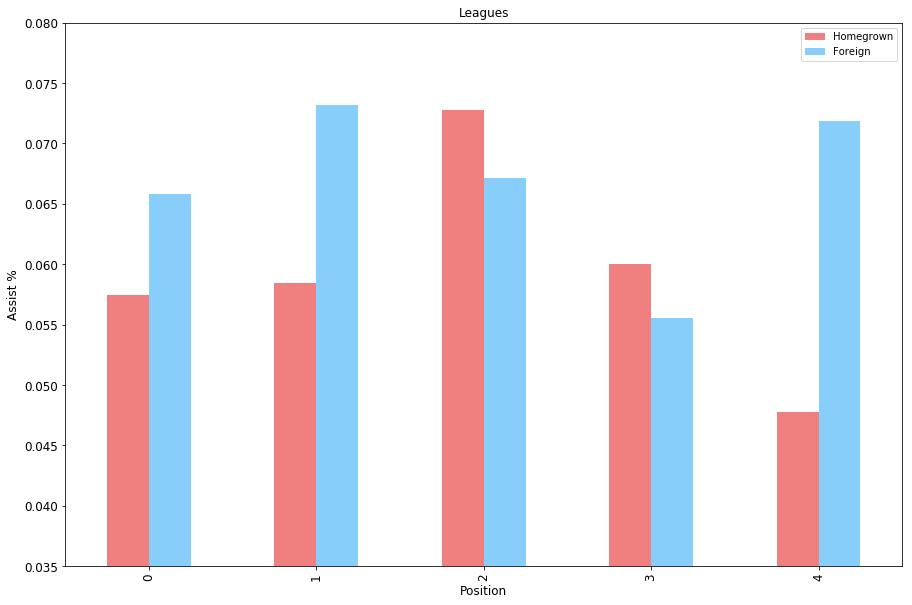

In [89]:
ax = assists[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10),color= ['lightcoral','lightskyblue'], legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Assist %", fontsize=12)
ax.set_ylim(0.035,0.08)
plt.show()

### Whos more likely to get a clean sheet (Goalkeepers)

In [34]:
EPLH_gkcleansheets = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPLF_gkcleansheets = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPL_gkcleansheets = pd.DataFrame([EPLH_gkcleansheets,EPLF_gkcleansheets])

BUNH_gkcleansheets = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUNF_gkcleansheets = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUN_gkcleansheets = pd.DataFrame([BUNH_gkcleansheets,BUNF_gkcleansheets])

LALH_gkcleansheets = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LALF_gkcleansheets = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LAL_gkcleansheets = pd.DataFrame([LALH_gkcleansheets,LALF_gkcleansheets])

L1H_gkcleansheets = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1F_gkcleansheets = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1_gkcleansheets = pd.DataFrame([L1H_gkcleansheets,L1F_gkcleansheets])

SEIH_gkcleansheets = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEIF_gkcleansheets = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEI_gkcleansheets = pd.DataFrame([SEIH_gkcleansheets,SEIF_gkcleansheets])

gkcleansheets = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
gkcleansheets.set_value(0,'League',"EPL")
gkcleansheets.set_value(0,'Homegrown',EPLH_gkcleansheets)
gkcleansheets.set_value(0,'Foreign',EPLF_gkcleansheets)
gkcleansheets.set_value(1,'League',"LAL")
gkcleansheets.set_value(1,'Homegrown',LALH_gkcleansheets )
gkcleansheets.set_value(1,'Foreign',LALF_gkcleansheets)
gkcleansheets.set_value(2,'League',"BUN")
gkcleansheets.set_value(2,'Homegrown',BUNH_gkcleansheets)
gkcleansheets.set_value(2,'Foreign',BUNF_gkcleansheets)
gkcleansheets.set_value(3,'League',"L1")
gkcleansheets.set_value(3,'Homegrown',L1H_gkcleansheets)
gkcleansheets.set_value(3,'Foreign',L1F_gkcleansheets)
gkcleansheets.set_value(4,'League',"SEI")
gkcleansheets.set_value(4,'Homegrown',SEIH_gkcleansheets)
gkcleansheets.set_value(4,'Foreign',SEIF_gkcleansheets)

,League,Homegrown,Foreign
0,EPL,0.223278,0.283162
1,LAL,0.25863,0.286505
2,BUN,0.280529,0.334731
3,L1,0.271188,0.23206
4,SEI,0.245509,0.316857


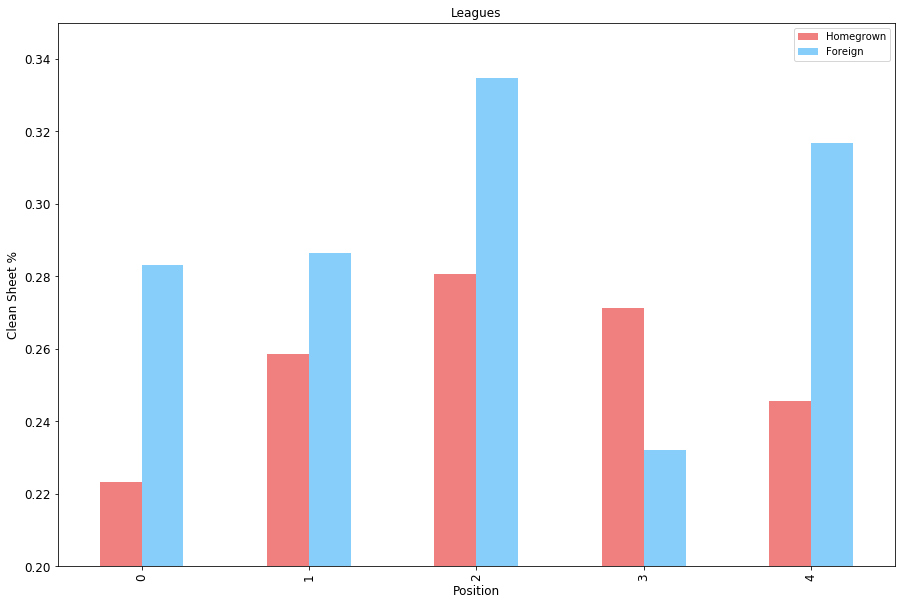

In [88]:
ax = gkcleansheets[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", color= ['lightcoral','lightskyblue'],figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Clean Sheet %", fontsize=12)
ax.set_ylim(0.2,0.35)
plt.show()

## So who preforms the best vs Who is better rated?

In [36]:
EPLH_form = Homegrown_EPL['Average Form'].mean()
EPLF_form = Foreign_EPL['Average Form'].mean()
EPL_form = pd.DataFrame([EPLH_form,EPLF_form])

LALH_form = Homegrown_LAL['Average Form'].mean()
LALF_form = Foreign_LAL['Average Form'].mean()
LAL_form = pd.DataFrame([LALH_form,LALF_form])

BUNH_form = Homegrown_BUN['Average Form'].mean()
BUNF_form = Foreign_BUN['Average Form'].mean()
BUN_form = pd.DataFrame([BUNH_form,BUNF_form])

L1H_form = Homegrown_L1['Average Form'].mean()
L1F_form = Foreign_L1['Average Form'].mean()
L1_form = pd.DataFrame([L1H_form,L1F_form])

SEIH_form = Homegrown_SEI['Average Form'].mean()
SEIF_form = Foreign_SEI['Average Form'].mean()
SEI_form = pd.DataFrame([SEIH_form,SEIF_form])


form = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
form.set_value(0,'League',"EPL")
form.set_value(0,'Homegrown',EPLH_form)
form.set_value(0,'Foreign',EPLF_form)
form.set_value(1,'League',"LAL")
form.set_value(1,'Homegrown',LALH_form )
form.set_value(1,'Foreign',LALF_form)
form.set_value(2,'League',"BUN")
form.set_value(2,'Homegrown',BUNH_form)
form.set_value(2,'Foreign',BUNF_form)
form.set_value(3,'League',"L1")
form.set_value(3,'Homegrown',L1H_form)
form.set_value(3,'Foreign',L1F_form)
form.set_value(4,'League',"SEI")
form.set_value(4,'Homegrown',SEIH_form)
form.set_value(4,'Foreign',SEIF_form)

,League,Homegrown,Foreign
0,EPL,2.31152,2.5862
1,LAL,2.11461,2.56098
2,BUN,2.34053,2.40808
3,L1,2.26404,2.37418
4,SEI,2.16801,2.37202


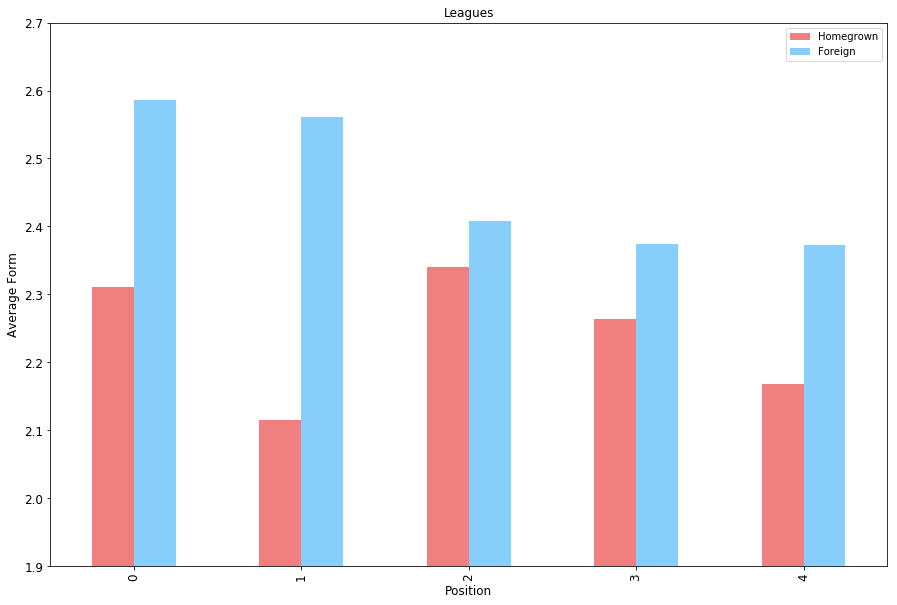

In [85]:
ax = form[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10),color= ['lightcoral','lightskyblue'], legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
ax.set_ylim(1.9,2.7)
plt.show()

In [38]:
EPLH_overall = Homegrown_EPL['overall'].mean()
EPLF_overall = Foreign_EPL['overall'].mean()
EPL_overall = pd.DataFrame([EPLH_overall,EPLF_overall])

LALH_overall = Homegrown_LAL['overall'].mean()
LALF_overall = Foreign_LAL['overall'].mean()
LAL_overall = pd.DataFrame([LALH_overall,LALF_overall])

BUNH_overall = Homegrown_BUN['overall'].mean()
BUNF_overall = Foreign_BUN['overall'].mean()
BUN_overall = pd.DataFrame([BUNH_overall,BUNF_overall])

L1H_overall = Homegrown_L1['overall'].mean()
L1F_overall = Foreign_L1['overall'].mean()
L1_overall = pd.DataFrame([L1H_overall,L1F_overall])

SEIH_overall = Homegrown_SEI['overall'].mean()
SEIF_overall = Foreign_SEI['overall'].mean()
SEI_overall = pd.DataFrame([SEIH_overall,SEIF_overall])

overall = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
overall.set_value(0,'League',"EPL")
overall.set_value(0,'Homegrown',EPLH_overall)
overall.set_value(0,'Foreign',EPLF_overall)
overall.set_value(1,'League',"LAL")
overall.set_value(1,'Homegrown',LALH_overall )
overall.set_value(1,'Foreign',LALF_overall)
overall.set_value(2,'League',"BUN")
overall.set_value(2,'Homegrown',BUNH_overall)
overall.set_value(2,'Foreign',BUNF_overall)
overall.set_value(3,'League',"L1")
overall.set_value(3,'Homegrown',L1H_overall)
overall.set_value(3,'Foreign',L1F_overall)
overall.set_value(4,'League',"SEI")
overall.set_value(4,'Homegrown',SEIH_overall)
overall.set_value(4,'Foreign',SEIF_overall)

,League,Homegrown,Foreign
0,EPL,74.8794,78.1026
1,LAL,75.7582,78.5132
2,BUN,74.8111,76.2717
3,L1,73.0481,74.4115
4,SEI,74.094,76.6142


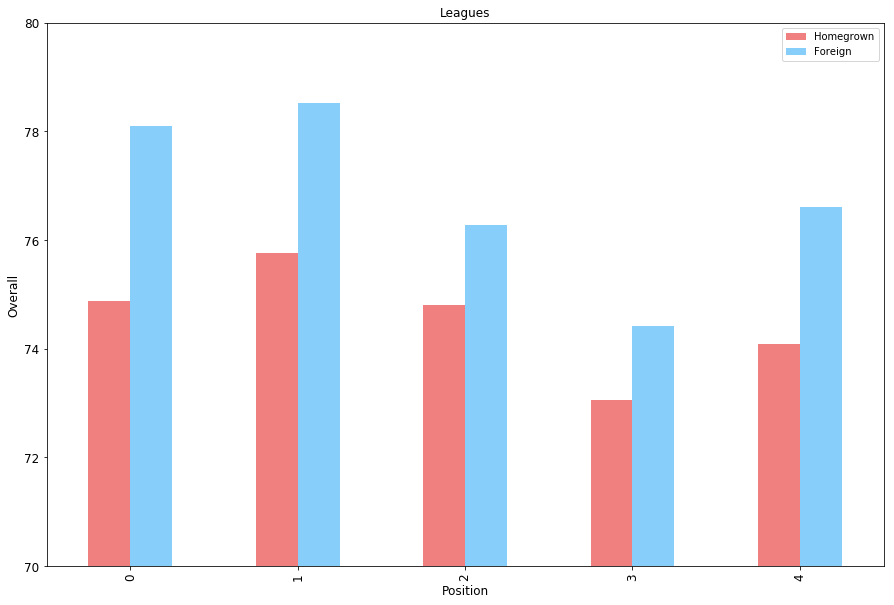

In [87]:
ax = overall[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10),color= ['lightcoral','lightskyblue'], legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Overall", fontsize=12)
ax.set_ylim(70,80)
plt.show()

$pip install folium

adding in a heat map not complete yet

In [99]:
# Import libraries
import pandas as pd
import folium

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join("../../data/raw/world.json")


# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)

# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=RQ2,
 columns=['nationality', 'Players'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.3,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)

TypeError: can't multiply sequence by non-int of type 'float'